## 機械学習スクラッチ　ロジスティック回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

λ = ハイパーパラメーター

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
y.columns = ["Species"]
df = pd.concat([X , y] , axis = 1)

In [3]:
df_cn = df.query("Species == [1,2]").loc[: , :]
X = df_cn.iloc[: , :4].values
y = df_cn.iloc[: , -1].values

In [4]:
y[y==2]=0
#yを0,1にしなければ計算に誤差が生まれる

In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter = 100, lr = 0.01, bias = True, verbose = True):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass


    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        pass
        return

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        pass
        return

## 【問題1】仮定関数

In [7]:
def _linear_hypothesis(X):
    theta = np.random.rand(X.shape[1] + 1)
    one = np.ones(X.shape[0]).reshape(-1 , 1)
    X = np.concatenate([one , X] , axis = 1)
    z = np.dot(X , theta)
    h = 1 / (1 + np.exp(-z))
    return h

In [8]:
_linear_hypothesis(X)

array([0.99978621, 0.99972619, 0.99977828, 0.99887885, 0.9996431 ,
       0.99935042, 0.9997586 , 0.99808333, 0.99963074, 0.9991207 ,
       0.99751996, 0.99957152, 0.99879925, 0.99956057, 0.99932852,
       0.99972255, 0.99950788, 0.99911634, 0.99931439, 0.99892311,
       0.99972834, 0.99945623, 0.99950403, 0.99943609, 0.99958097,
       0.99968271, 0.99967332, 0.99977558, 0.99956819, 0.99894734,
       0.99876018, 0.99864225, 0.99924287, 0.99955176, 0.99945288,
       0.99973549, 0.9997501 , 0.99928578, 0.99940162, 0.9990468 ,
       0.99906972, 0.99959206, 0.99918444, 0.99802858, 0.99924182,
       0.9993869 , 0.99938869, 0.99953413, 0.99850803, 0.99933246,
       0.9998964 , 0.9996128 , 0.99987806, 0.9997345 , 0.99984488,
       0.99991081, 0.9990957 , 0.999851  , 0.99970681, 0.99994995,
       0.99983633, 0.99972207, 0.99985309, 0.99955548, 0.99976559,
       0.99986774, 0.99977832, 0.99995967, 0.99990308, 0.99926332,
       0.99990126, 0.9996301 , 0.99989249, 0.99967241, 0.99988

## 問題2】最急降下法

In [9]:
def error(h , y):
    return h - y
#error(_linear_hypothesis(X) , y)

In [10]:
def _gradient_descent(X ,y , lr = 0.01, bias = True):
    theta = np.random.rand(X.shape[1] + 1)
    one = np.ones(X.shape[0]).reshape(-1 , 1)
    X = np.concatenate([one , X] , axis = 1)
    if bias:
        theta_copy =  theta.copy()
        theta_copy[0] = 0
        theta = np.dot((error(_linear_hypothesis(X) , y)) , X ) / X.shape[0] + lr * theta_copy / X.shape[0]
        return theta
    else:
        theta = np.dot((error(_linear_hypothesis(X) , y)) , X ) / X.shape[0] + lr * theta /X.shape[0]
        return theta

In [11]:
_gradient_descent(X , y)

array([0.49976128, 3.29265209, 1.48647367, 2.77511095, 1.01279099])

In [12]:
#theta = np.random.rand(X.shape[1])
#X.shape[0] + 0.01 * theta[1:] / X.shape[0]
#np.dot((error(_linear_hypothesis(X) , y)) , X )
#X.shape[0] + 0.01 * theta[1:] / X.shape[0]

## 【問題3】推定

In [13]:
def predict(X):
        y_pred = _linear_hypothesis(X)
        list_ = []
        for i in y_pred:
            if i < 0.5:
                list_.append(0)
            elif i > 0.5:
                list_.append(1)
        return list_

In [14]:
def predict_proba(X):
    y_pred = _linear_hypothesis(X)
    return y_pred

In [15]:
#predict(X)

In [16]:
def predict(X):
    
    return np.where(_linear_hypothesis(X) < 0.5 , 0 , 1)

## 【問題4】目的関数


In [17]:
theta = np.random.rand(X.shape[1] + 1)
def j_loss(X , y , lr = 0.01):
    loss = np.sum(-y * np.log(_linear_hypothesis(X)) - (1 - y) * np.log(1 - _linear_hypothesis(X))) / X.shape[0] +( lr / (2 * X.shape[0])) * np.sum(theta ** 2)
    return loss



In [18]:
j_loss(X , y)

7.344875341515934

## 【問題6】学習と推定

In [19]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter = 100 , lr = 0.01, bias = True , verbose = True,  lam=0.01):
        self.h = None
        self.theta = None
        
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lam = lam
    
    def _linear_hypothesis(self , X):
        z = np.dot(X , self.theta)
        self.h = 1 / (1 + np.exp(-z))
        return self.h
    
    def _get_error(self, h , y):
        return self.h - y

    def _gradient_descent(self , X , error):
        if self.bias:
            theta_copy =  self.theta.copy()
            theta_copy[0] = 0
            self.theta -= self.lr * np.dot(self.error , X ) / X.shape[0] + self.lam * theta_copy / X.shape[0]
            return self.theta
        else:
            self.theta -= self.lr * np.dot(self.error , X ) / X.shape[0] + self.lam * self.theta /X.shape[0]
            return self.theta
        
    def _get_j_loss(self , X , y ):
        
        cross = np.sum(-y * np.log(self.h) - (1 - y) * np.log(1 - self.h)) / X.shape[0]
        reg = ( self.lam* np.sum(self.theta ** 2) / (2 * X.shape[0])) 
        self.l  = cross + reg
        
        #print('cross',cross)
        #print('reg',reg)
        #self.l = np.sum(-y * np.log(self.h) - (1 - y) * np.log(1 - self.h)) / X.shape[0] +( self.lam* np.sum(self.theta ** 2) / (2 * X.shape[0])) 
        return self.l
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        if self.bias:
            self.one = np.ones(X.shape[0]).reshape(-1 , 1)
            X = np.concatenate([self.one , X] , axis = 1)
            
            if X_val is not None:
                self.one = np.ones(X_val.shape[0]).reshape(-1 , 1)
                X_val = np.concatenate([self.one , X_val] , axis = 1)
        np.random.seed(0)
        self.theta = np.random.rand(X.shape[1] )
        
        for i in range(self.iter):
            self.h = self._linear_hypothesis(X)
            #print('h:',self.h)
            self.error = self._get_error(self.h , y)
            #print('error',self.error)
            self._gradient_descent(X , self.error)
            #print('theta',self.theta)
            self.j_loss = self._get_j_loss( X , y )
            self.loss[i] = self.j_loss
            
            if X_val is not None:
                self.h_val = self._linear_hypothesis(X_val)
                self.j_loss_val = self._get_j_loss( X_val , y_val )
                self.val_loss[i] = self.j_loss_val

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.loss)

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            self.one = np.ones(X.shape[0]).reshape(-1 , 1)
            X = np.concatenate([self.one , X] , axis = 1)
        z = np.dot(X , self.theta)
        self.h = 1 / (1 + np.exp(-z))
        
        return np.where(self.h < 0.5 , 0 , 1)
        #list_ = []
        #for i in self.h:
            #if i < 0.5:
                #list_.append(0)
            #elif i > 0.5:
                #list_.append(1)
        #return list_


    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        
        return self.h

In [20]:
from sklearn.model_selection import train_test_split

#X = (X - X.mean() ) / X.std() 
X_train , X_test , y_train , y_test = train_test_split(
               X , y , test_size = 0.2)

In [21]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
slr = ScratchLogisticRegression(lr = 0.1, num_iter = 10000,  lam=0.01)
# 0.000001はloss上がる
# lr = 0.0001, num_iter = 50000,  lam=0.01

In [23]:
slr.fit(X_train , y_train , X_test , y_test)

[5.43054525 3.26480755 1.22362443 ... 0.11757736 0.11757651 0.11757566]


## 【問題7】学習曲線のプロット

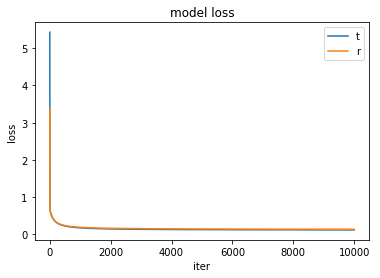

In [24]:
plt.plot(np.arange(1 , len(slr.loss) + 1) , slr.loss , label = "train_loss")
plt.plot(np.arange(1 , len(slr.val_loss) + 1) , slr.val_loss , label = "test_loss")
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend("train_loss")
plt.show()

In [43]:
slr.predict_proba(X_test)

array([0.99837161, 0.99841666, 0.99846047, ..., 0.00224542, 0.00230928,
       0.00237494])

In [26]:
y_train

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [27]:
y_pred = slr.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score ,  confusion_matrix

In [29]:
def learn_model(X , y , model = slr):
    X_train , X_test , y_train , y_test = train_test_split(
                  X[:,1:3] , y , test_size = 0.2)
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test , y_pred)
    pre_score = precision_score(y_test , y_pred)
    re_score = recall_score(y_test , y_pred)
    f_score = f1_score(y_test , y_pred)
    con_mat = confusion_matrix(y_test , y_pred)
    
    print("accuracy_score :" , score)
    print("precision_score :" , pre_score)
    print("recall_score :" , re_score)
    print("f1_score :" , f_score)
    print("confusion_matrix :" , con_mat)

In [30]:
learn_model(X , y)

[2.93709792 2.00176727 1.17589358 ... 0.21415726 0.21415411 0.21415096]
accuracy_score : 0.9
precision_score : 0.8888888888888888
recall_score : 0.8888888888888888
f1_score : 0.8888888888888888
confusion_matrix : [[10  1]
 [ 1  8]]


## 【問題8】決定領域の可視化

In [31]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o" , "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [32]:
y_train

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [33]:
slr.fit(X_train[:,1:3] , y_train)

[2.99740196 2.0251954  1.17093632 ... 0.22798095 0.22797721 0.22797348]


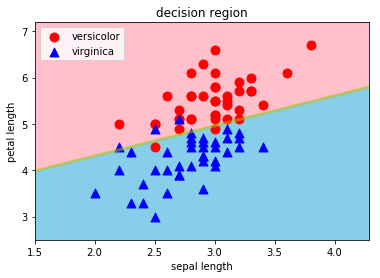

In [34]:
decision_region(X_train[:,1:3] , y_train , slr ,  title='decision region', xlabel='sepal length', 
                             ylabel='petal length', target_names=['versicolor', 'virginica'] )

In [35]:
#import sklearn
#print(sklearn.__version__)

## 【問題9】（アドバンス課題）重みの保存

In [36]:
np.savez("theta" , slr.theta)
archive = np.load("theta.npz")

In [37]:
archive.files

['arr_0']

In [38]:
archive["arr_0"]

array([13.02380182,  2.81039215, -4.32834348])